# Session 3 - More image processing

In [15]:
import os
import sys
sys.path.append("..")

import cv2 #opencv

import numpy as np
from utils.imutils import jimshow as show #utility functions
from utils.imutils import jimshow_channel as show_channel

#plotting
import matplotlib.pyplot as plt

In [16]:
filepath = os.path.join("..", "..", "..", "cds-vis-data", "data","img","terasse.jpeg")

In [17]:
image = cv2.imread(filepath)

In [18]:
image.shape

(1576, 1200, 3)

### Greyscale histogram

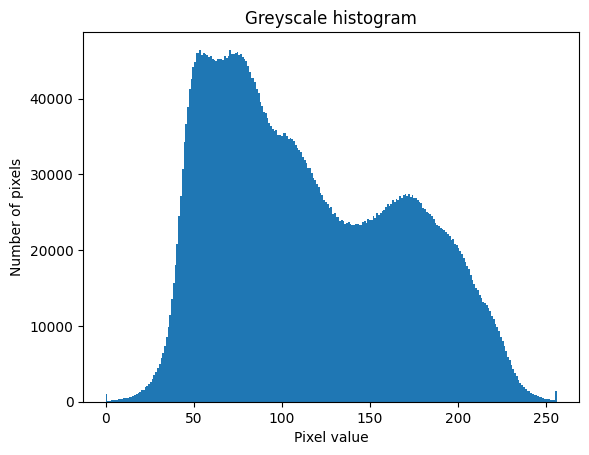

In [19]:
#converting to greyscale
greyed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure()

#add my histogram
plt.hist(image.flatten(), 255, [0,256])

#add title and labels
plt.title("Greyscale histogram")
plt.xlabel("Pixel value")
plt.ylabel("Number of pixels")


#show the plot
plt.show()

Syntax: cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

Parameters:

images: list of images as numpy arrays. All images must be of the same dtype and same size.

channels: list of the channels used to calculate the histograms.

mask: optional mask (8 bit array) of the same size as the input image.

histSize: histogram sizes in each dimension

ranges: Array of the dims arrays of the histogram bin boundaries in each dimension

hist: Output histogram

accumulate: accumulation flag, enables to compute a single histogram from several sets of arrays.

Return: It returns an array of histogram points of dtype float32.

In [20]:
histB = cv2.calcHist([image], [0], None, [255], [0,256])
histG = cv2.calcHist([image], [1], None, [255], [0,256])
histR = cv2.calcHist([image], [2], None, [255], [0,256])

In [21]:
histB.shape

(255, 1)

Text(0, 0.5, 'Number of pixels')

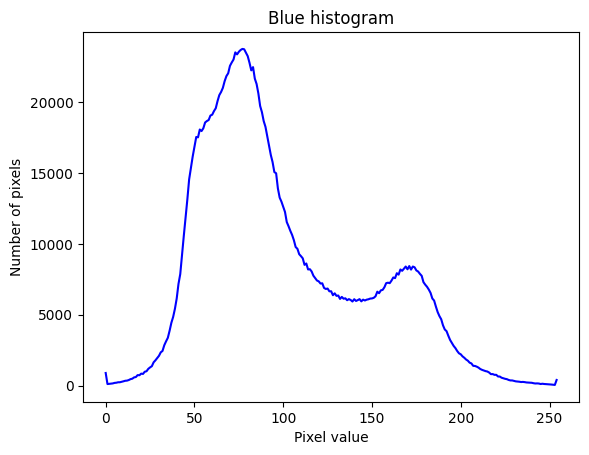

In [22]:
#plotting with matplotlic
#create figure
plt.figure()

#Add histogram
plt.plot(histB, color="blue")

#plot title
plt.title("Blue histogram")
plt.xlabel("Pixel value")
plt.ylabel("Number of pixels")



Text(0, 0.5, 'Number of pixels')

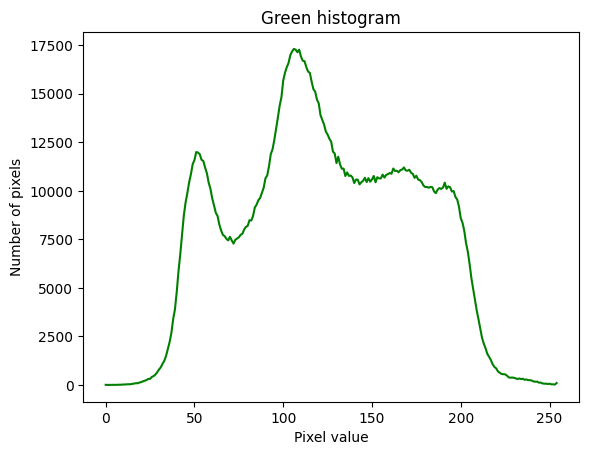

In [23]:
#plotting with matplotlic
#create figure
plt.figure()

#Add histogram
plt.plot(histG, color="green")

#plot title
plt.title("Green histogram")
plt.xlabel("Pixel value")
plt.ylabel("Number of pixels")

Text(0, 0.5, 'Number of pixels')

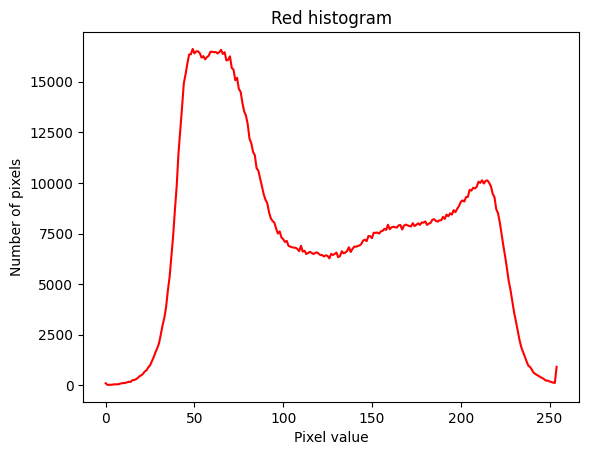

In [24]:
#plotting with matplotlic
#create figure
plt.figure()

#Add histogram
plt.plot(histR, color="red")

#plot titleb
plt.title("Red histogram")
plt.xlabel("Pixel value")
plt.ylabel("Number of pixels")

Text(0, 0.5, 'Number of pixels')

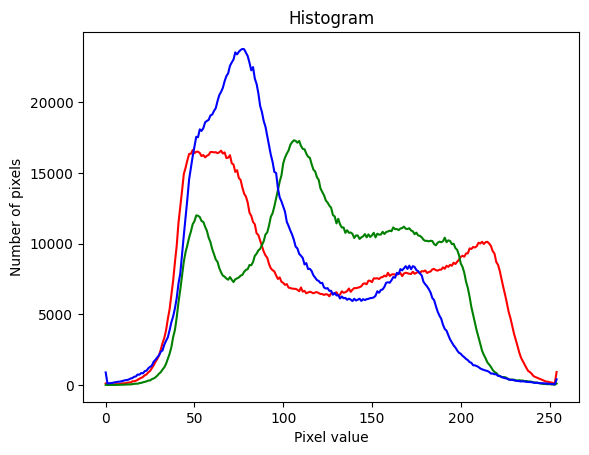

In [25]:
#alle tre colourchannelse i samme plot
#plotting with matplotlic
#create figure
plt.figure()

#Add histogram
plt.plot(histR, color="red")
plt.plot(histG, color="green")
plt.plot(histB, color="blue")

#plot title
plt.title("Histogram")
plt.xlabel("Pixel value")
plt.ylabel("Number of pixels")

In [26]:
#using cv2.split
#deconstructing the values into three variables

BLUE, GREEN, RED = cv2.split(image)

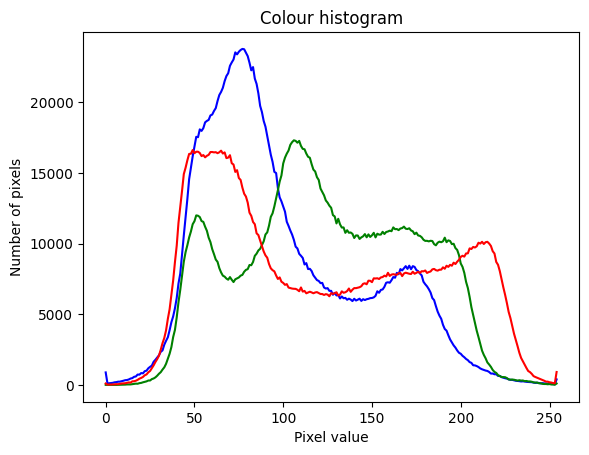

In [28]:
#create tuples by splitting the imgae into seperate colour channels
channels = cv2.split(image)

#create colour tuple
colors = ("blue", "green", "red")

#create plot
plt.figure()

#add title
plt.title("Colour histogram")

#name on the axis
plt.xlabel("Pixel value")
plt.ylabel("Number of pixels")

#define a counter variable for my for loop and initialize

i = 0

#put something in the figure by using a for loop
for channel in channels:
    hist = cv2.calcHist([channel], [0], None, [255], [0,256])
    line_color = colors[i] #colours in the plot
    plt.plot(hist, color=line_color)
    i += 1
    

### Comparing histograms

In [43]:
#load photos
filepath_1 = os.path.join("..", "..", "..", "cds-vis-data", "data","img","trex.png")

filepath_2 = os.path.join("..", "..", "..", "cds-vis-data", "data","img","t-rex2.png")

In [44]:
image_1 = cv2.imread(filepath_1)


In [45]:
image_2 = cv2.imread(filepath_2)

In [46]:
hist_1 = cv2.calcHist([image_1], [0,1,2], None, [255,255,255], [0,256, 0,256, 0,256])
hist_2 = cv2.calcHist([image_2], [0,1,2], None, [255,255,255], [0,256, 0,256, 0,256])

In [49]:
normalized_hist_1 = cv2.normalize(hist_1, hist_1, 0, 1.0, cv2.NORM_MINMAX)
normalized_hist_2 = cv2.normalize(hist_2, hist_2, 0, 1.0, cv2.NORM_MINMAX)

In [50]:
normalized_hist_1

array([[[0.00082048, 0.        , 0.0001641 , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [51]:
#the distance between the two histograms
cv2.compareHist(normalized_hist_1, normalized_hist_2, cv2.HISTCMP_CHISQR)
#the lower the value the more similar they are

33.76446366400455

In [52]:
#rounding numbers - in this case to two decimals
round(cv2.compareHist(normalized_hist_1, normalized_hist_2, cv2.HISTCMP_CHISQR),2)

33.76

### Playing around with comparing histograms

In [53]:
#load other photos
filepath_3 = os.path.join("..", "..", "..", "cds-vis-data", "data","img","beach.png")

filepath_4 = os.path.join("..", "..", "..", "cds-vis-data", "data","img","wave.png")

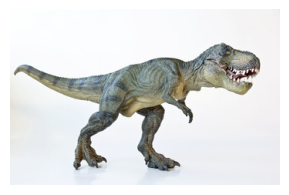

In [63]:
show(image_1)

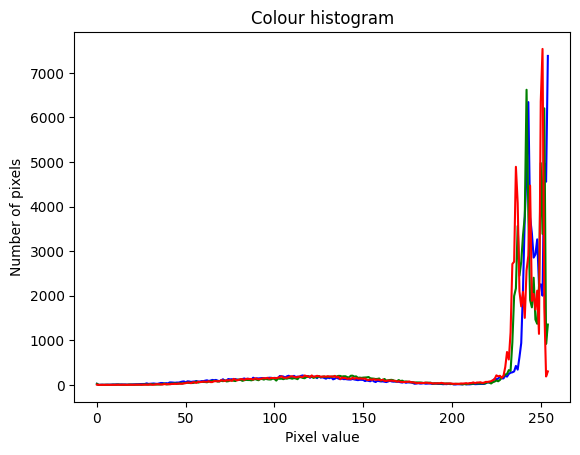

In [67]:
#create tuples by splitting the imgae into seperate colour channels
channels = cv2.split(image_1)

#create colour tuple
colors = ("blue", "green", "red")

#create plot
plt.figure()

#add title
plt.title("Colour histogram")

#name on the axis
plt.xlabel("Pixel value")
plt.ylabel("Number of pixels")

#define a counter variable for my for loop and initialize

i = 0

#put something in the figure by using a for loop
for channel in channels:
    hist = cv2.calcHist([channel], [0], None, [255], [0,256])
    line_color = colors[i] #colours in the plot
    plt.plot(hist, color=line_color)
    i += 1

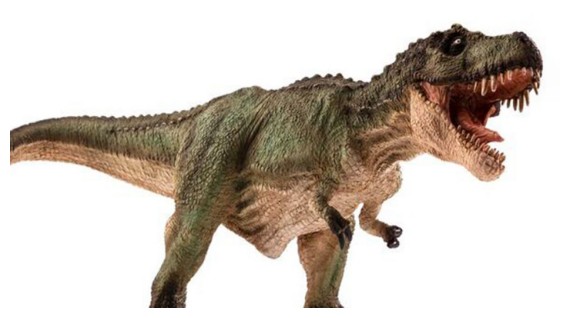

In [64]:
show(image_2)

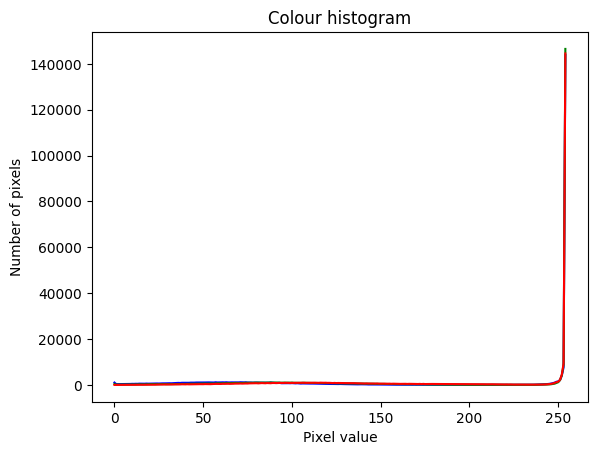

In [68]:
#create tuples by splitting the imgae into seperate colour channels
channels = cv2.split(image_2)

#create colour tuple
colors = ("blue", "green", "red")

#create plot
plt.figure()

#add title
plt.title("Colour histogram")

#name on the axis
plt.xlabel("Pixel value")
plt.ylabel("Number of pixels")

#define a counter variable for my for loop and initialize

i = 0

#put something in the figure by using a for loop
for channel in channels:
    hist = cv2.calcHist([channel], [0], None, [255], [0,256])
    line_color = colors[i] #colours in the plot
    plt.plot(hist, color=line_color)
    i += 1

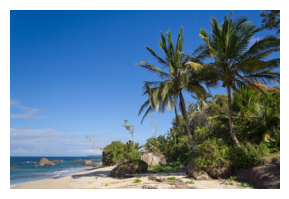

In [65]:
show(image_3)

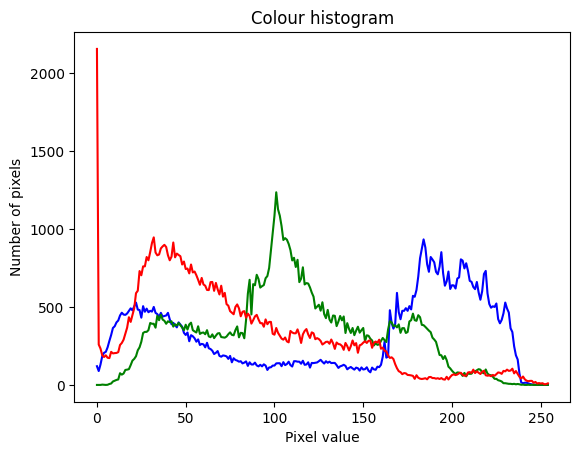

In [70]:
#create tuples by splitting the imgae into seperate colour channels
channels = cv2.split(image_3)

#create colour tuple
colors = ("blue", "green", "red")

#create plot
plt.figure()

#add title
plt.title("Colour histogram")

#name on the axis
plt.xlabel("Pixel value")
plt.ylabel("Number of pixels")

#define a counter variable for my for loop and initialize

i = 0

#put something in the figure by using a for loop
for channel in channels:
    hist = cv2.calcHist([channel], [0], None, [255], [0,256])
    line_color = colors[i] #colours in the plot
    plt.plot(hist, color=line_color)
    i += 1

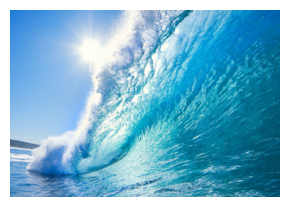

In [66]:
show(image_4)

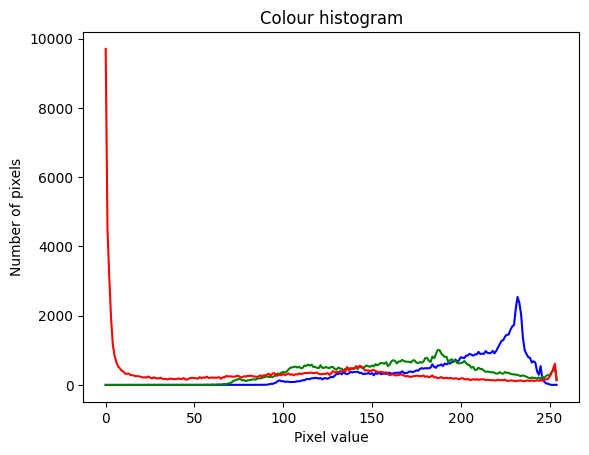

In [71]:
#create tuples by splitting the imgae into seperate colour channels
channels = cv2.split(image_4)

#create colour tuple
colors = ("blue", "green", "red")

#create plot
plt.figure()

#add title
plt.title("Colour histogram")

#name on the axis
plt.xlabel("Pixel value")
plt.ylabel("Number of pixels")

#define a counter variable for my for loop and initialize

i = 0

#put something in the figure by using a for loop
for channel in channels:
    hist = cv2.calcHist([channel], [0], None, [255], [0,256])
    line_color = colors[i] #colours in the plot
    plt.plot(hist, color=line_color)
    i += 1

In [54]:
image_3 = cv2.imread(filepath_3)
image_4 = cv2.imread(filepath_4)

In [55]:
hist_3 = cv2.calcHist([image_3], [0,1,2], None, [255,255,255], [0,256, 0,256, 0,256])
hist_4 = cv2.calcHist([image_4], [0,1,2], None, [255,255,255], [0,256, 0,256, 0,256])


In [58]:
normalized_hist_3 = cv2.normalize(hist_3, hist_3, 0, 1.0, cv2.NORM_MINMAX)
normalized_hist_4 = cv2.normalize(hist_4, hist_4, 0, 1.0, cv2.NORM_MINMAX)

#### Compare the different photos

In [59]:
cv2.compareHist(normalized_hist_1, normalized_hist_3, cv2.HISTCMP_CHISQR)

57.54414946880588

In [60]:
cv2.compareHist(normalized_hist_1, normalized_hist_4, cv2.HISTCMP_CHISQR)

100.03742167603382

In [61]:
cv2.compareHist(normalized_hist_3, normalized_hist_4, cv2.HISTCMP_CHISQR)

325.91685598264

#### Compare different comparison methods
https://docs.opencv.org/3.4/d8/dc8/tutorial_histogram_comparison.html

vær opmærksom på at metoderne er skrevet anderledes

In [75]:
cv2.compareHist(normalized_hist_1, normalized_hist_2, cv2.HISTCMP_CORREL)

0.029902053278777

In [74]:
cv2.compareHist(normalized_hist_1, normalized_hist_2, cv2.HISTCMP_INTERSECT)

0.126601962183031

In [76]:
cv2.compareHist(normalized_hist_1, normalized_hist_2, cv2.HISTCMP_BHATTACHARYYA)

0.9492663759644249

### Exercise 1
We've now seen how to load images and split them into their separate colour channels. We've also seen how we can use this to extract colour histograms showing distributions of pixel intensities across each channel. Lastly we've seen how we can use this to plot colour histograms for any given image.

In your groups, rework the code from today to create and save colour histograms for each of the images in the data folder.

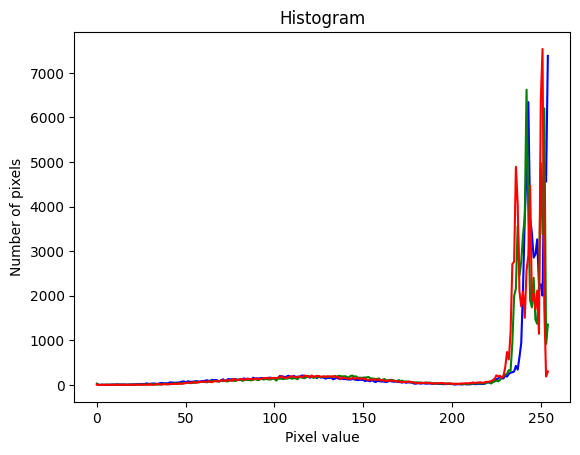

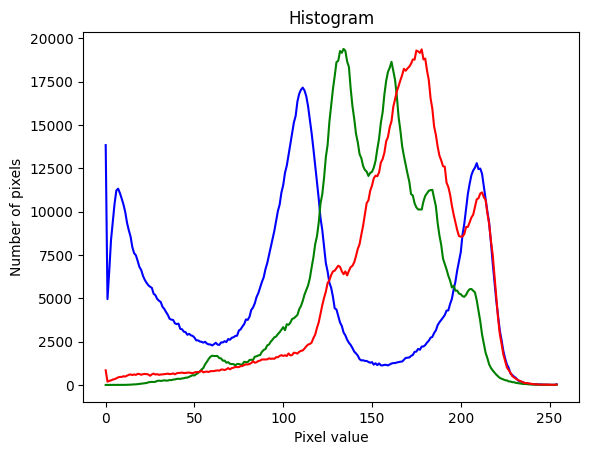

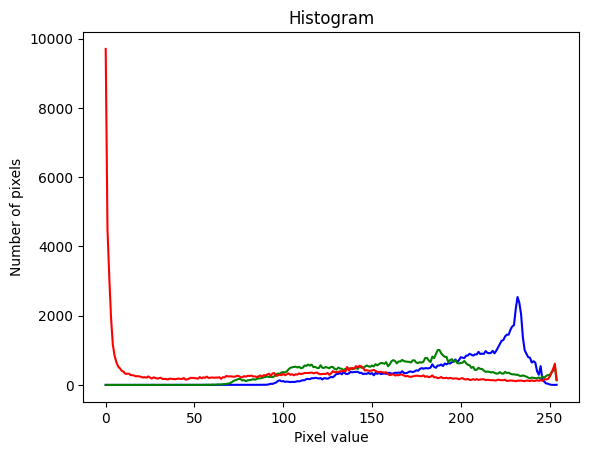

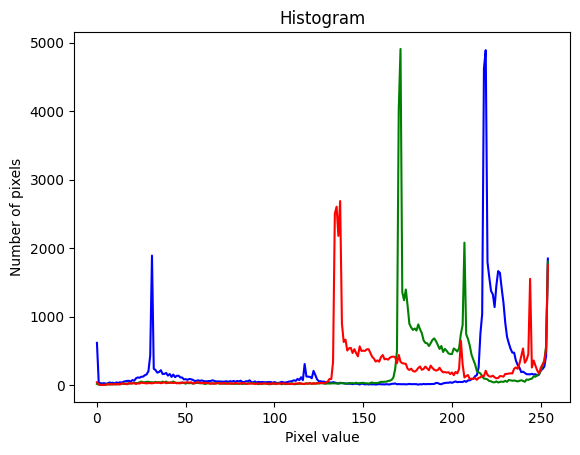

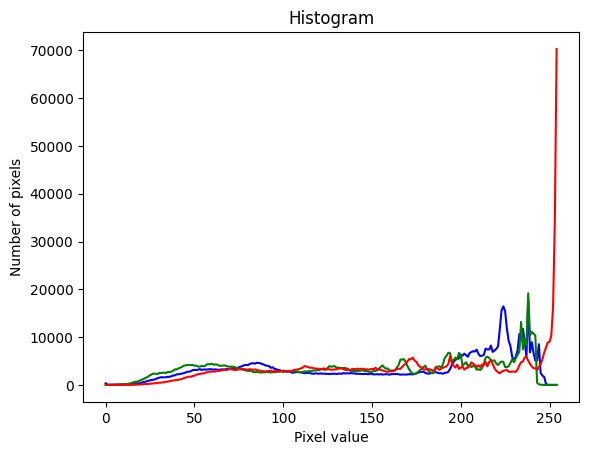

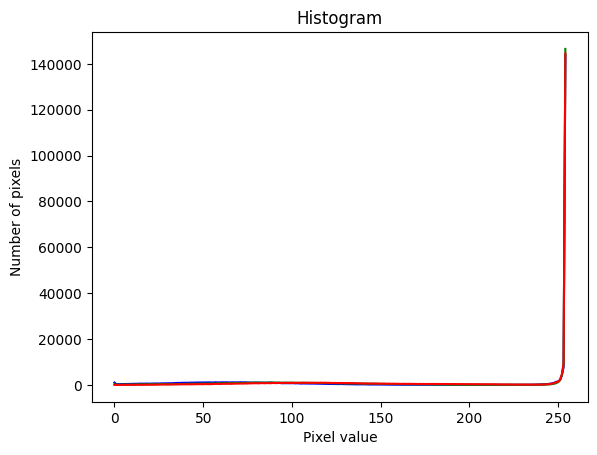

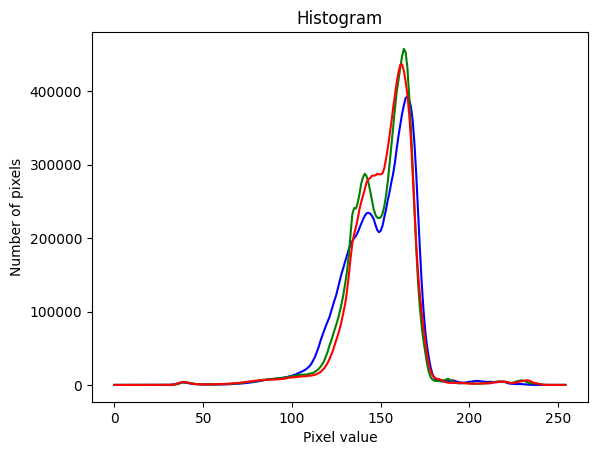

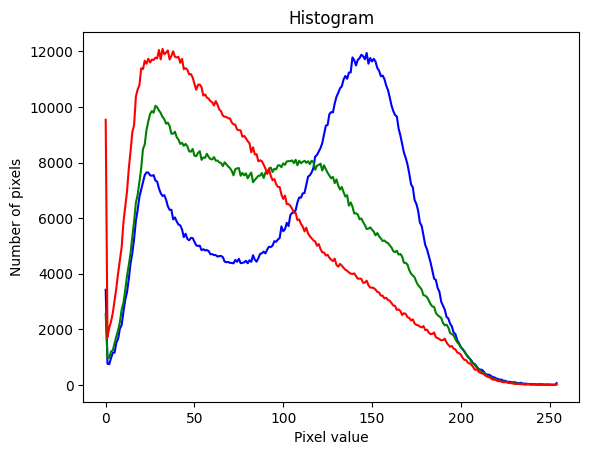

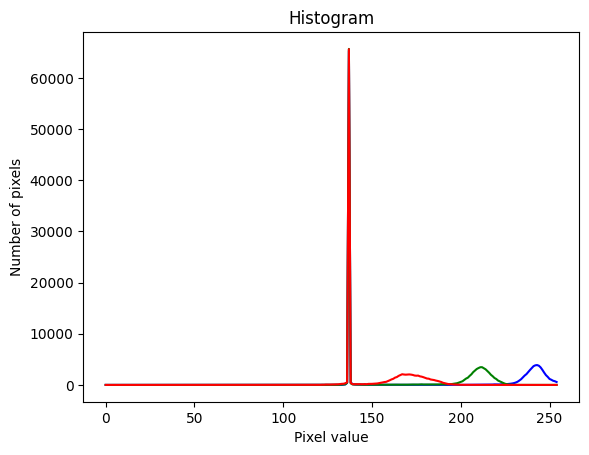

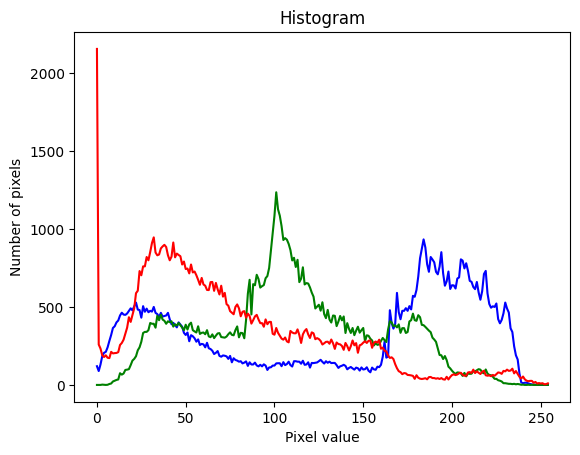

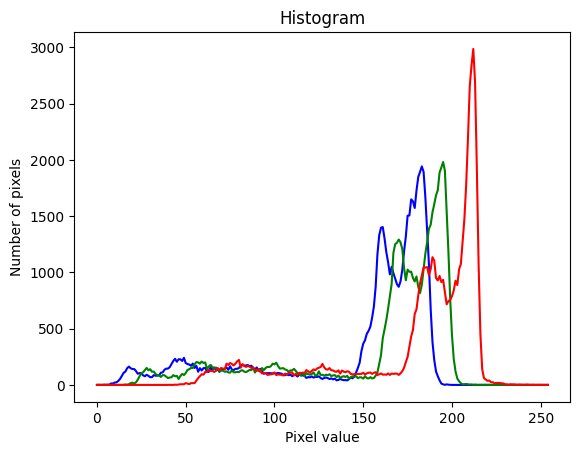

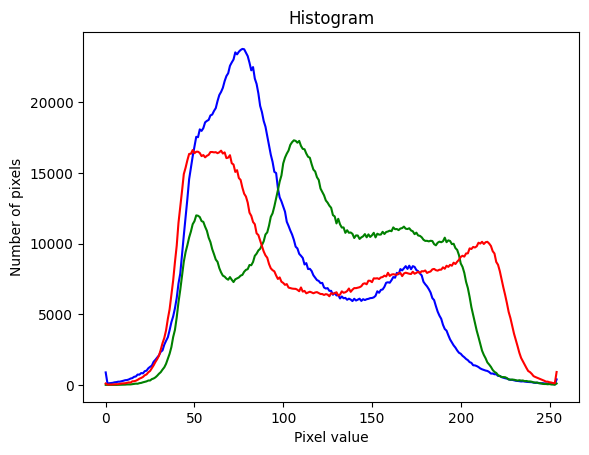

In [90]:
#find the folder with the files
data_path = os.path.join("..", "..", "..", "cds-vis-data", "data","img")
#lav en liste over filerne i mappen
file_list = os.listdir(data_path)
#lav en filepath til hvor filerne skal ende
out_path = os.path.join("..","output")

#Så laver man en for loop, hvor man først loader alle filerne
for filename in file_list: #det er elementerne i filelist man vil gørre noget ved
    filepath = data_path+"/"+filename #man finder filepath til hver eneste fil
    image = cv2.imread(filepath) #så loader man selve billedet
    channels = cv2.split(image) #så splitter man billedet i de tre colorchannels
    colors = ("blue", "green", "red") #Så definere man hvilken farve de forskellige colorchannels har i plottet
    plt.figure() #tegner det "canvas" som man laver plottet på
    plt.title("Histogram") 
    plt.xlabel("Pixel value")
    plt.ylabel("Number of pixels")
    i = 0 #inkluder en counter variable, men er ikke sikker på hvad den gør
    for channel in channels: #så laver man en ny for loop inde i den anden for loop, som så tegner histogrammerne
        hist = cv2.calcHist([channel], [0], None, [255], [0,256]) #Syntax: cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
                                                                  #Se forklaring på syntax længere oppe
        line_color = colors[i] 
        plt.plot(hist, color=line_color)
        i += 1
    plt.savefig(out_path+"/"+filename)  #gemmer filen i sin outpath, med et navn, som man vil give den
  

### Exercise 2
In the shared drive cds-vis-data, you'll find a directory comprising 1360 different images of flowers. Many of these are different images of the same flower.

In groups, do the following activity:

Pick a random flower from the dataset, load it, and normalize it

Compare that image's colour histogram to every other flower in the dataset

Print save the filename of the 5 closest images, along with the distance score you calculated

Hint: use pandas

Qualitatively inspect the images - how does your algorithm perform?

Rewrite your code as a function which takes any input filename from a user and produces the new results showing top 5 closest images for the chosen image

This in-class exercise is going to be Assignment 1 for Visual Analytics, designing a simple image search algorithm. The Github classroom repo for this Assignment will go online later.